In [2]:
import ipyparallel as ipp
from ipyparallel.util import interactive
import matplotlib.pyplot as plt
import pickle

In [3]:
from EM import EM
from plot import plot
import numpy as np

In [44]:
# em_list has the em object for multiple runs
def print_coeff(em_list, signal_name, plot_loglik=True, plot_mse=True):
    if signal_name == 'inr' or 'inr_more_treatments':
        num_past_effects = 3
    else:
        num_past_effects = 2
    num_iter = len(em_list)
    treatment_names, chronic_keywords, demographic_names = signal_context[signal_name]
    A = np.zeros((num_iter, num_past_effects, len(treatment_names.keys())))
    b = np.zeros((num_iter, len(chronic_keywords) + len(demographic_names)))
    transition_std = np.zeros(num_iter)
    observation_std = np.zeros(num_iter)
    initial_state_std = np.zeros(num_iter)
    initial_state_mean = np.zeros(num_iter)
    mse_list = []
    loglik_list = []
    for i, em in enumerate(em_list):
        A[i, :, :] = em.A
        b[i, :] = em.b
        initial_state_mean[i] =  em.init_z
        initial_state_std[i] = np.sqrt(em.sigma_0)
        transition_std[i] = np.sqrt(em.sigma_1)
        observation_std[i] = np.sqrt(em.sigma_2)
        mse_list.append(em.mse)
        loglik_list.append(em.obs_log_lik)
    
    print('{} coefficients averaged over {} runs'.format(signal_name, num_iter))
    for j in range(num_past_effects):
        print('past time point {}'.format(j+1))
        for i, treatment in enumerate(treatment_names.keys()):
            if num_iter > 1:
                print('{}: {}±{}'.format(treatment, np.round(np.average(A, axis=0)[j, i], 4), np.round(np.std(A, axis=0)[j, i], 4)))
            else:
                print('{}: {}'.format(treatment, np.round(np.average(A, axis=0)[j, i], 4)))
            
    static_types = chronic_keywords + demographic_names
    for j, static in enumerate(static_types):
        if num_iter > 1:
            print('{}: {}±{}'.format(static, np.round(np.average(b, axis=0)[j], 4), np.round(np.std(b, axis=0)[j], 4)))
        else:
            print('{}: {}'.format(static, np.round(np.average(b, axis=0)[j], 4)))
    
    if num_iter > 1:
        print('initial state mean: {}±{}'.format(np.round(np.average(initial_state_mean), 4), np.round(np.std(initial_state_mean), 4)))
        print('initial state std: {}±{}'.format(np.round(np.average(initial_state_std), 4), np.round(np.std(initial_state_std), 4)))
        print('transition noise (std): {}±{}'.format(np.round(np.average(transition_std), 4), np.round(np.std(transition_std), 4)))
        print('observation noise (std): {}±{}'.format(np.round(np.average(observation_std), 4), np.round(np.std(observation_std), 4)))
    else:
        print('initial state mean: {}'.format(np.round(np.average(initial_state_mean), 4)))
        print('initial state std: {}'.format(np.round(np.average(initial_state_std), 4)))
        print('transition noise (std): {}'.format(np.round(np.average(transition_std), 4)))
        print('observation noise (std): {}'.format(np.round(np.average(observation_std), 4)))
    
    if plot_loglik:
        for loglik in loglik_list:
            plt.plot([i for i in range(len(loglik))], loglik)
            plt.xlabel('Iterations')
            plt.ylabel('Observed data log likelihood')
            plt.title('EM log likelihood of {}'.format(signal_name))
            plt.show()
    if plot_mse:
        for mse in mse_list:
            plt.plot([i for i in range(len(mse))], mse)
            plt.xlabel('Iterations')
            plt.ylabel('MSE')
            plt.title('Prediction MSE of {}'.format(signal_name))
            plt.show()

In [25]:
signal_context = pickle.load(open('../Data/signal_context.pkl', 'rb'))

In [26]:
all_signals = list(signal_context.keys())

In [27]:
all_signals

['creatinine', 'inr', 'platelets', 'lactate', 'bun', 'inr_more_treatments']

In [8]:
training_pct = .8
single_effect = False

### Sequential Training (better for testing model change)

In [11]:
%%time
signal_name = 'bun'
num_past_effects = 2
data = np.load('../Data/'+signal_name+'_preprocessed_data.npz')
sequential_results = [] # store the em object after training
for i in range(1):
    em = EM(data['y_mtx'], data['X_mtx'], data['c_mtx'], num_past_effects, K=0, train_pct=training_pct, X_prev_given=True,
        X_prev = data['X_prev_mtx'], single_effect=single_effect, init_0=.001)
    em.run_EM(10000)
    print('Finish run {} for {}'.format(i+1, signal_name))
    sequential_results.append(em)
#pickle.dump(all_params, open('../Data/est_params.pkl', 'wb'))

iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
iteration 20
iteration 21
iteration 22
iteration 23
iteration 24
iteration 25
iteration 26
iteration 27
iteration 28
iteration 29
iteration 30
iteration 31
iteration 32
iteration 33
iteration 34
iteration 35
iteration 36
iteration 37
iteration 38
iteration 39
iteration 40
iteration 41
iteration 42
iteration 43
iteration 44
iteration 45
iteration 46
iteration 47
iteration 48
iteration 49
iteration 50
iteration 51
iteration 52
iteration 53
iteration 54
iteration 55
iteration 56
iteration 57
iteration 58
iteration 59
iteration 60
iteration 61
iteration 62
iteration 63
iteration 64
iteration 65
iteration 66
iteration 67
iteration 68
iteration 69
iteration 70
iteration 71
iteration 72
iteration 73
iteration 74
iteration 75
iteration 76
iteration 77
iteratio

iteration 594
iteration 595
iteration 596
iteration 597
iteration 598
iteration 599
iteration 600
iteration 601
iteration 602
iteration 603
iteration 604
iteration 605
iteration 606
iteration 607
iteration 608
iteration 609
iteration 610
iteration 611
iteration 612
iteration 613
iteration 614
iteration 615
iteration 616
iteration 617
iteration 618
iteration 619
iteration 620
iteration 621
iteration 622
iteration 623
iteration 624
iteration 625
iteration 626
iteration 627
iteration 628
iteration 629
iteration 630
iteration 631
iteration 632
iteration 633
iteration 634
iteration 635
iteration 636
iteration 637
iteration 638
iteration 639
iteration 640
iteration 641
iteration 642
iteration 643
iteration 644
iteration 645
iteration 646
iteration 647
iteration 648
iteration 649
iteration 650
iteration 651
iteration 652
iteration 653
iteration 654
iteration 655
iteration 656
iteration 657
iteration 658
iteration 659
iteration 660
iteration 661
iteration 662
iteration 663
iteration 664
iterat

iteration 1168
iteration 1169
iteration 1170
iteration 1171
iteration 1172
iteration 1173
iteration 1174
iteration 1175
iteration 1176
iteration 1177
iteration 1178
iteration 1179
iteration 1180
iteration 1181
iteration 1182
iteration 1183
iteration 1184
iteration 1185
iteration 1186
iteration 1187
iteration 1188
iteration 1189
iteration 1190
iteration 1191
iteration 1192
iteration 1193
iteration 1194
iteration 1195
iteration 1196
iteration 1197
iteration 1198
iteration 1199
iteration 1200
iteration 1201
iteration 1202
iteration 1203
iteration 1204
iteration 1205
iteration 1206
iteration 1207
iteration 1208
iteration 1209
iteration 1210
iteration 1211
iteration 1212
iteration 1213
iteration 1214
iteration 1215
iteration 1216
iteration 1217
iteration 1218
iteration 1219
iteration 1220
iteration 1221
iteration 1222
iteration 1223
iteration 1224
iteration 1225
iteration 1226
iteration 1227
iteration 1228
iteration 1229
iteration 1230
iteration 1231
iteration 1232
iteration 1233
iteration 

iteration 1715
iteration 1716
iteration 1717
iteration 1718
iteration 1719
iteration 1720
iteration 1721
iteration 1722
iteration 1723
iteration 1724
iteration 1725
iteration 1726
iteration 1727
iteration 1728
iteration 1729
iteration 1730
iteration 1731
iteration 1732
iteration 1733
iteration 1734
iteration 1735
iteration 1736
iteration 1737
iteration 1738
iteration 1739
iteration 1740
iteration 1741
iteration 1742
iteration 1743
iteration 1744
iteration 1745
iteration 1746
iteration 1747
iteration 1748
iteration 1749
iteration 1750
iteration 1751
iteration 1752
iteration 1753
iteration 1754
iteration 1755
iteration 1756
iteration 1757
iteration 1758
iteration 1759
iteration 1760
iteration 1761
iteration 1762
iteration 1763
iteration 1764
iteration 1765
iteration 1766
iteration 1767
iteration 1768
iteration 1769
iteration 1770
iteration 1771
iteration 1772
iteration 1773
iteration 1774
iteration 1775
iteration 1776
iteration 1777
iteration 1778
iteration 1779
iteration 1780
iteration 

KeyboardInterrupt: 

bun coefficients averaged over 1 runs
dialysis: [-13.6772  -8.961 ]
diuretic: [0.5432 0.4412]
drugs_increase: [-0.5363 -0.4034]
chronic_kidney: 24.8706
kidney_cancer: 10.3211
renal: 10.6144
esrd: 16.2005
heart_failure: 9.4382
liver: 7.8225
initial state mean: 18.8559
initial state std: 20.4615
transition noise (std): 5.9264
observation noise (std): 0.3121


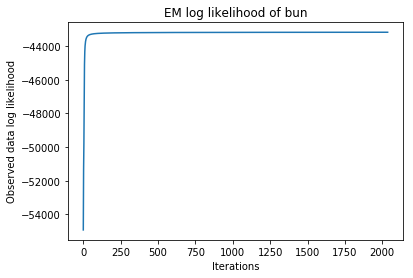

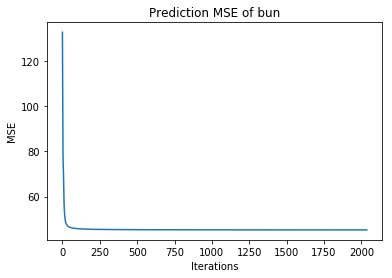

In [13]:
print_coeff([em], 'bun')

In [12]:
print_coeff(sequential_results, signal_name)

bun coefficients averaged over 0 runs
dialysis: [nan nan]
diuretic: [nan nan]
drugs_increase: [nan nan]
chronic_kidney: nan
kidney_cancer: nan
renal: nan
esrd: nan
heart_failure: nan
liver: nan
initial state mean: nan
initial state std: nan
transition noise (std): nan
observation noise (std): nan


/home/bear/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:1128: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/bear/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/home/bear/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


### Parallel Training (better for generating whole set of coefficients)

In [28]:
rc = ipp.Client(profile='myprofile')

/home/bear/anaconda3/lib/python3.6/site-packages/ipyparallel/client/client.py:459: RuntimeWarning: 
            Controller appears to be listening on localhost, but not on this machine.
            If this is true, you should specify Client(...,sshserver='you@brahms')
            or instruct your controller to listen on an external IP.
  RuntimeWarning)


In [29]:
rc.ids

[0, 1, 2, 3, 4, 5, 6, 7]

In [30]:
dview = rc[:]

In [31]:
import os
import signal
engine_pids = rc[:].apply(os.getpid).get_dict()

def signal_engine(engine_id, sig=signal.SIGINT):
    """send a signal to a local engine"""
    pid = engine_pids[engine_id]
    os.kill(pid, sig)

In [32]:
with dview.sync_imports():
    import numpy
%px np = numpy 

importing numpy on engine(s)


In [34]:
# run em on a given signal
# return em object after convergence
def run_em_on_signal(signal_name):
    #import sys
    #sys.path.insert(0, '/home/bear/Documents/Counterfactual-Prediction/EM.py')
    import importlib
    import EM
    importlib.reload(EM)
    from EM import EM
    
    training_pct = .8
    single_effect = False
    if signal_name == 'inr' or 'inr_more_treatments':
        num_past_effects = 3
    else:
        num_past_effects = 2
    #treatment_names, chronic_keywords, demographic_names = signal_context[signal_name]
    data = np.load('../Data/'+signal_name+'_preprocessed_data.npz')
    em = EM(data['y_mtx'], data['X_mtx'], data['c_mtx'], num_past_effects, K=0, train_pct=training_pct, X_prev_given=True,
        X_prev = data['X_prev_mtx'], single_effect=single_effect, init_0=0.001)
    em.run_EM(20000)
    return em

In [20]:
test_signals = ['creatinine', 'bun', 'inr', 'lactate', 'platelets']

In [80]:
all_signals_params = dview.map(run_em_on_signal, test_signals)

In [84]:
all_signals_params.wait_interactive()

   5/5 tasks finished after 2380 s
done


In [90]:
all_signals_params.get()[0].init_state

array([-0.01997503])

creatinine coefficients averaged over 1 runs
dialysis: [-1.3203 -0.7576]
nephrotoxic_drugs: [-0.0164 -0.0248]
dronedarone: [-0.0652  0.1061]
diuretic: [0.0439 0.0179]
ace_i: [ 0.0097 -0.0042]
arb: [0.0916 0.0521]
chronic_kidney: 1.2426
kidney_cancer: 0.101
renal: 0.2447
esrd: 2.634
sickle_cell: 0.6886
gender: 0.2259
admit_weight: -0.0187
initial state mean: 2.7047
initial state std: 1.7847
transition noise (std): 0.4293
observation noise (std): 0.0918


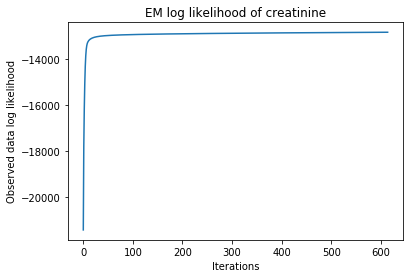

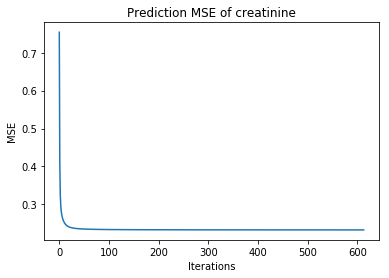

bun coefficients averaged over 1 runs
dialysis: [-13.6935  -8.9975]
diuretic: [0.5338 0.4335]
drugs_increase: [-0.5328 -0.4025]
chronic_kidney: 22.5714
kidney_cancer: 8.0412
renal: 9.1227
esrd: 13.3886
heart_failure: 6.8359
liver: 4.4214
initial state mean: 20.5142
initial state std: 20.0873
transition noise (std): 5.9069
observation noise (std): 0.5605


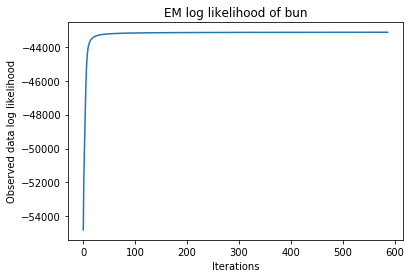

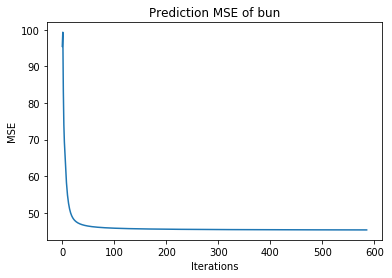

inr coefficients averaged over 1 runs
nsaid: [-0.0741 -0.1191 -0.1176]
anticoagulant: [-0.0141  0.2122  0.1417]
transfusion_platelets: [-0.1642 -0.2539 -0.1578]
liver_disease: 0.228
sickle_cell: -0.064
initial state mean: 2.2174
initial state std: 1.3492
transition noise (std): 0.6582
observation noise (std): 0.3161


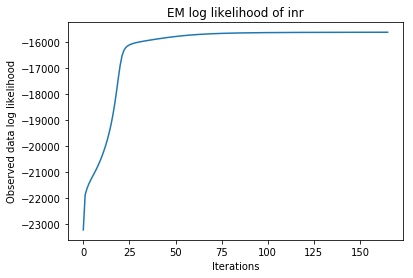

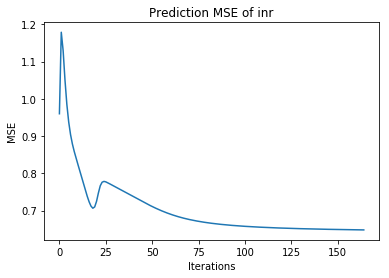

lactate coefficients averaged over 1 runs
ivf: [ 0.2739 -0.1248]
antibiotics: [-0.5708 -0.23  ]
drugs_elevate_lactate: [ 0.3011 -0.2751]
chronic_kidney: -0.2956
kidney_cancer: -2.9409
renal: -0.4525
esrd: -0.2138
diabete: -1.0573
liver: 1.7315
initial state mean: 4.5413
initial state std: 2.9069
transition noise (std): 2.1285
observation noise (std): 0.7467


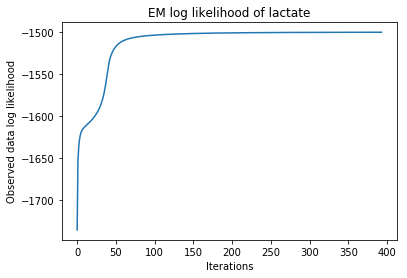

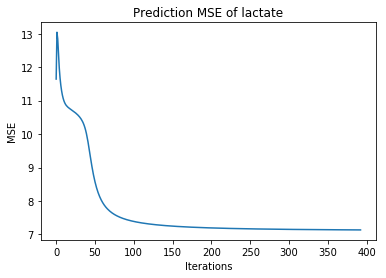

platelets coefficients averaged over 1 runs
platelets_transfusion: [6.9197 1.2143]
ditp: [-17.5464  -7.8111]
liver: -76.4661
sickle_cell: 63.9573
initial state mean: 226.1658
initial state std: 99.6646
transition noise (std): 23.3053
observation noise (std): 16.6558


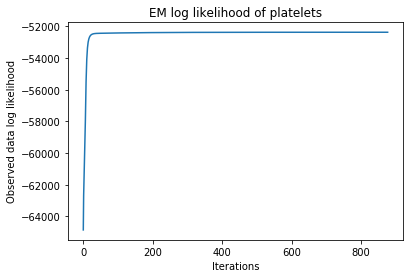

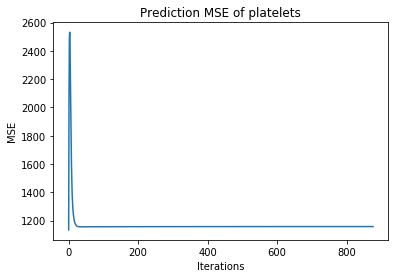

In [85]:
for i, signal_name in enumerate(test_signals):
    print_coeff([all_signals_params[i]], signal_name)

In [96]:
# cross validation on the initialization of b and sigma 0
def cv_init(args):
    import importlib
    import EM
    importlib.reload(EM)
    from EM import EM

    signal_name, init = args
    data = np.load('../Data/'+signal_name+'_preprocessed_data.npz')
    em = EM(data['y_mtx'], data['X_mtx'], data['c_mtx'], J=3, K=0, train_pct=.8, X_prev_given=True,
        X_prev = data['X_prev_mtx'], init_A_given=True, init_A=init, init_b_given=True, 
            init_b=np.zeros((data['c_mtx'].shape[1])), init_0=0.001, init_state=0, init_1=.01, init_2=.01)
    em.run_EM(20000)
    return em

In [97]:
treatment_names.keys()

dict_keys(['nsaid', 'anticoagulant', 'transfusion_plasma', 'transfusion_platelets', 'aspirin'])

In [104]:
pos_1 = np.full((3, 1), 1, dtype=float)
neg_1 = np.full((3, 1), -1, dtype=float)

In [105]:
init_choices = [np.zeros((3, 5)),
                              np.concatenate([pos_1, pos_1, neg_1, neg_1, pos_1], axis=1)]
                              
#init_choices = [0, np.sqrt(.001), -np.sqrt(.001), 2*np.sqrt(.001), -2*np.sqrt(.001), 3*np.sqrt(.001), -3*np.sqrt(.001)]
test_signals = ['inr_more_treatments']
grouped_args = [(signal, init) for signal in test_signals for init in init_choices]

In [106]:
grouped_args

[('inr_more_treatments', array([[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]])),
 ('inr_more_treatments', array([[ 1.,  1., -1., -1.,  1.],
         [ 1.,  1., -1., -1.,  1.],
         [ 1.,  1., -1., -1.,  1.]]))]

In [107]:
cv_params = dview.map(cv_init, grouped_args)

In [108]:
cv_params.wait_interactive()

   2/2 tasks finished after  715 s
done


In [109]:
for i, arg in enumerate(grouped_args):
    print(np.round(arg[1], 4))
    print(np.round(cv_params.get()[i].A, 4))
    print('')

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[-0.0208 -0.0172 -0.6803  0.1993 -0.1105]
 [-0.0742  0.2094 -0.3455  0.0748 -0.1408]
 [-0.0916  0.138  -0.3389  0.1061 -0.1215]]

[[ 1.  1. -1. -1.  1.]
 [ 1.  1. -1. -1.  1.]
 [ 1.  1. -1. -1.  1.]]
[[-0.0219 -0.0063 -0.686   0.2048 -0.1099]
 [-0.0752  0.213  -0.3445  0.0819 -0.1386]
 [-0.0908  0.1406 -0.3335  0.1074 -0.119 ]]



initial: [0. 0. 0. 0. 0. 0.]
lactate coefficients averaged over 1 runs
past time point 1
ivf: 0.2739
antibiotics: -0.5709
drugs_elevate_lactate: 0.301
past time point 2
ivf: -0.1248
antibiotics: -0.2299
drugs_elevate_lactate: -0.275
chronic_kidney: -0.2958
kidney_cancer: -2.9407
renal: -0.4533
esrd: -0.2147
diabete: -1.0582
liver: 1.7329
initial state mean: 4.5414
initial state std: 2.9076
transition noise (std): 2.129
observation noise (std): 0.7457


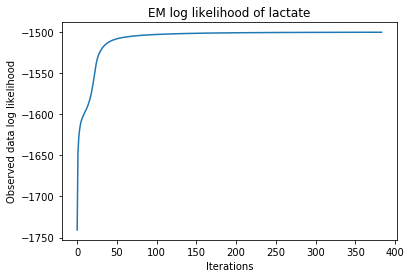

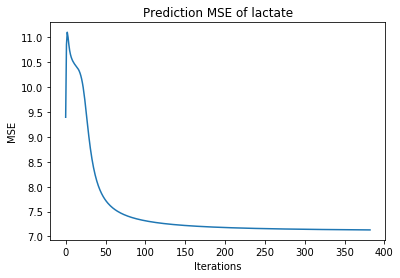

initial: [0.1 0.1 0.1 0.1 0.1 0.1]
lactate coefficients averaged over 1 runs
past time point 1
ivf: 0.2739
antibiotics: -0.5709
drugs_elevate_lactate: 0.301
past time point 2
ivf: -0.1248
antibiotics: -0.2299
drugs_elevate_lactate: -0.275
chronic_kidney: -0.2957
kidney_cancer: -2.9412
renal: -0.4536
esrd: -0.2148
diabete: -1.0584
liver: 1.7326
initial state mean: 4.5416
initial state std: 2.9077
transition noise (std): 2.129
observation noise (std): 0.7457


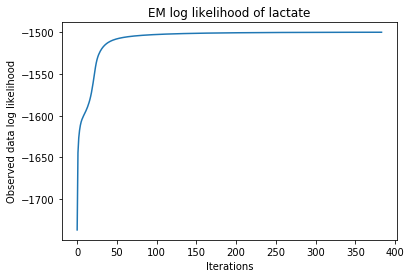

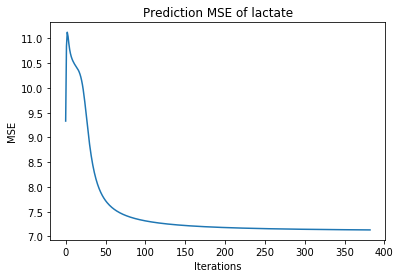

initial: [-0.1 -0.1 -0.1 -0.1 -0.1 -0.1]
lactate coefficients averaged over 1 runs
past time point 1
ivf: 0.2738
antibiotics: -0.5709
drugs_elevate_lactate: 0.301
past time point 2
ivf: -0.1248
antibiotics: -0.2299
drugs_elevate_lactate: -0.275
chronic_kidney: -0.2957
kidney_cancer: -2.9416
renal: -0.4539
esrd: -0.2149
diabete: -1.0586
liver: 1.7325
initial state mean: 4.5418
initial state std: 2.9077
transition noise (std): 2.129
observation noise (std): 0.7456


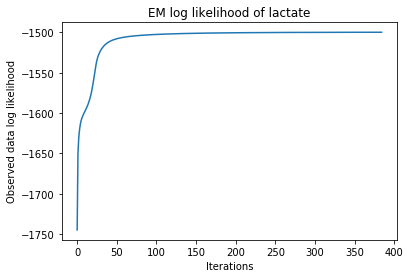

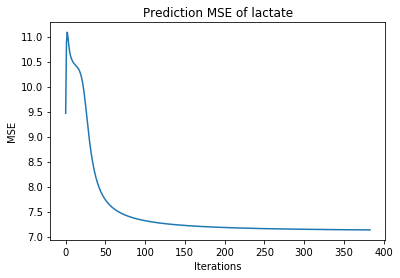

initial: [0.2 0.2 0.2 0.2 0.2 0.2]
lactate coefficients averaged over 1 runs
past time point 1
ivf: 0.2739
antibiotics: -0.5709
drugs_elevate_lactate: 0.301
past time point 2
ivf: -0.1248
antibiotics: -0.2299
drugs_elevate_lactate: -0.275
chronic_kidney: -0.2958
kidney_cancer: -2.941
renal: -0.4537
esrd: -0.2149
diabete: -1.0585
liver: 1.7329
initial state mean: 4.5416
initial state std: 2.9078
transition noise (std): 2.1291
observation noise (std): 0.7455


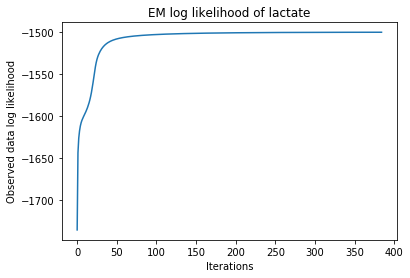

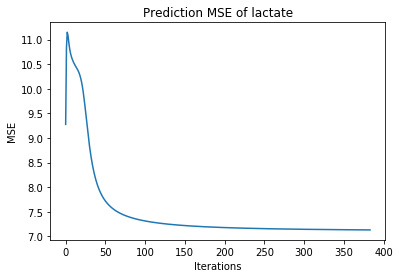

initial: [-0.2 -0.2 -0.2 -0.2 -0.2 -0.2]
lactate coefficients averaged over 1 runs
past time point 1
ivf: 0.2739
antibiotics: -0.5708
drugs_elevate_lactate: 0.301
past time point 2
ivf: -0.1248
antibiotics: -0.2299
drugs_elevate_lactate: -0.275
chronic_kidney: -0.2956
kidney_cancer: -2.9413
renal: -0.4534
esrd: -0.2146
diabete: -1.0581
liver: 1.7322
initial state mean: 4.5415
initial state std: 2.9074
transition noise (std): 2.1288
observation noise (std): 0.746


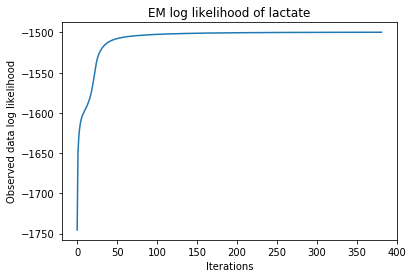

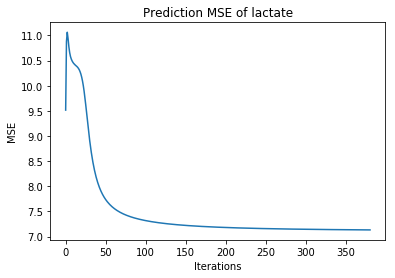

initial: [0.3 0.3 0.3 0.3 0.3 0.3]
lactate coefficients averaged over 1 runs
past time point 1
ivf: 0.2738
antibiotics: -0.5709
drugs_elevate_lactate: 0.3009
past time point 2
ivf: -0.1248
antibiotics: -0.2299
drugs_elevate_lactate: -0.2749
chronic_kidney: -0.2961
kidney_cancer: -2.9401
renal: -0.4537
esrd: -0.2153
diabete: -1.0588
liver: 1.7342
initial state mean: 4.5414
initial state std: 2.9082
transition noise (std): 2.1294
observation noise (std): 0.7449


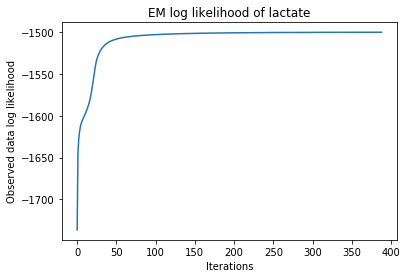

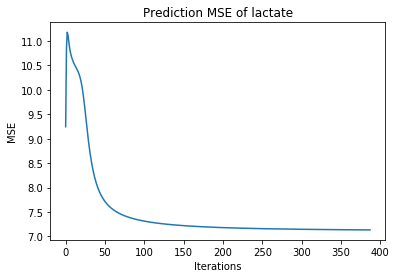

initial: [-0.3 -0.3 -0.3 -0.3 -0.3 -0.3]
lactate coefficients averaged over 1 runs
past time point 1
ivf: 0.2739
antibiotics: -0.5709
drugs_elevate_lactate: 0.301
past time point 2
ivf: -0.1248
antibiotics: -0.2299
drugs_elevate_lactate: -0.275
chronic_kidney: -0.2955
kidney_cancer: -2.942
renal: -0.4539
esrd: -0.2148
diabete: -1.0585
liver: 1.7319
initial state mean: 4.5418
initial state std: 2.9075
transition noise (std): 2.1289
observation noise (std): 0.7459


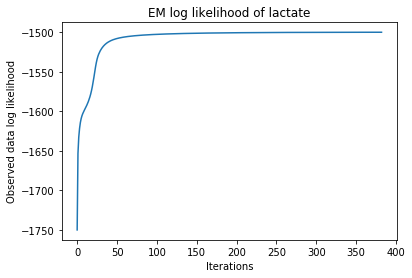

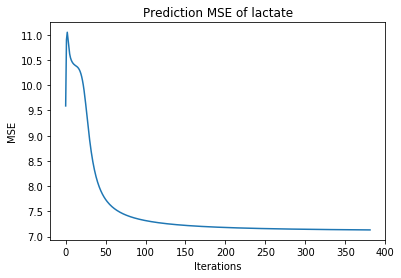

In [86]:
for i, arg in enumerate(grouped_args):
    print('initial: {}'.format(arg[1]))
    print_coeff([cv_params.get()[i]], arg[0])

In [68]:
def single_signal_multi_runs(signal_name):
    import importlib
    import EM
    importlib.reload(EM)
    from EM import EM

    data = np.load('../Data/'+signal_name+'_preprocessed_data.npz')
    em = EM(data['y_mtx'], data['X_mtx'], data['c_mtx'], J=3, K=0, train_pct=.8, X_prev_given=True,
        X_prev = data['X_prev_mtx'])
    em.run_EM(20000)
    return em

In [69]:
signal_name = 'inr_more_treatments'

In [70]:
multi_runs_params = dview.map(single_signal_multi_runs, [signal_name for i in range(8)])

In [71]:
multi_runs_params.wait_interactive()

   8/8 tasks finished after 1330 s
done


In [70]:
pickle.dump(multi_runs_params.get(), open('../Data/{}_multi_runs_params'.format(signal_name), 'wb'))

0, 4, 7

In [79]:
for i in range(8):
    em = multi_runs_params.get()[i]
    print('{}: {}'.format(i, em.b[1]))

0: -0.03285309751490036
1: 0.17880811381805634
2: 0.12157299805437613
3: 0.1828592387379359
4: 0.1779598983372973
5: 0.15772448523644328
6: 0.07684795818153475


IndexError: list index out of range

inr_more_treatments coefficients averaged over 7 runs
past time point 1
nsaid: -0.0213±0.0008
anticoagulant: -0.0175±0.0004
transfusion_plasma: -0.6804±0.0005
transfusion_platelets: 0.1988±0.0012
aspirin: -0.1096±0.0018
past time point 2
nsaid: -0.0743±0.0002
anticoagulant: 0.2093±0.0001
transfusion_plasma: -0.3452±0.0005
transfusion_platelets: 0.0745±0.0007
aspirin: -0.1398±0.002
past time point 3
nsaid: -0.0916±0.0
anticoagulant: 0.1379±0.0001
transfusion_plasma: -0.3387±0.0004
transfusion_platelets: 0.1058±0.0006
aspirin: -0.1204±0.0022
liver_disease: 0.3009±0.061
sickle_cell: 0.1233±0.073
age: 0.0165±0.007
initial state mean: 1.0358±0.507
initial state std: 1.3401±0.0079
transition noise (std): 0.6557±0.0008
observation noise (std): 0.3079±0.0012


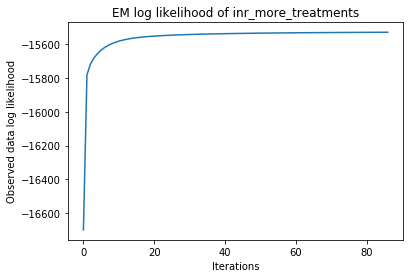

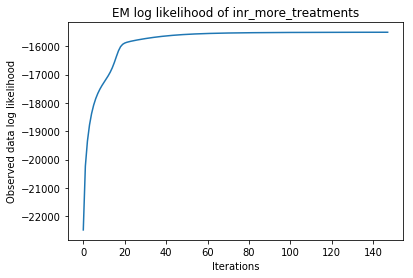

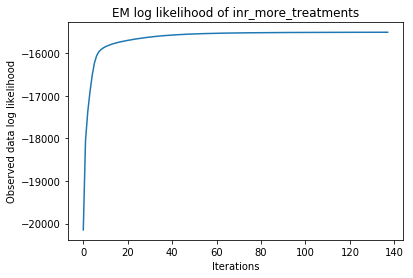

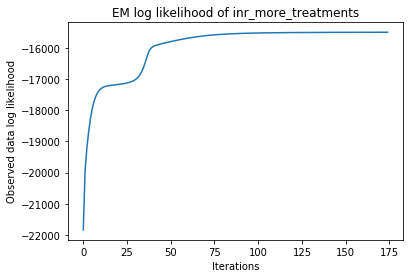

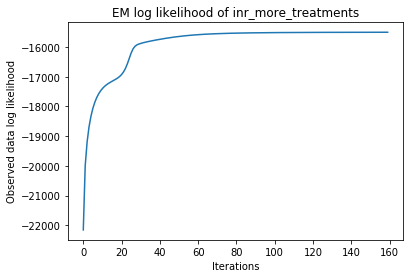

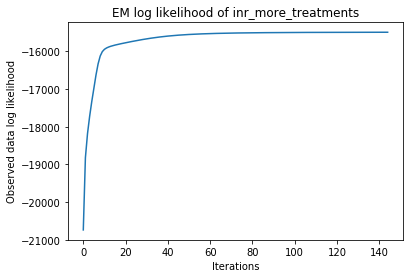

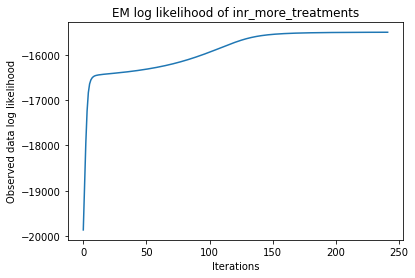

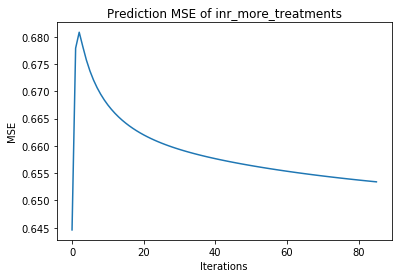

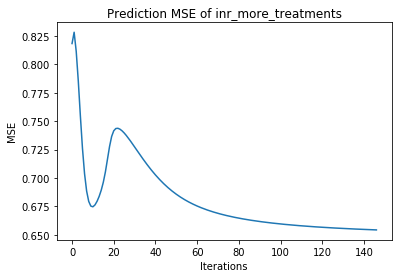

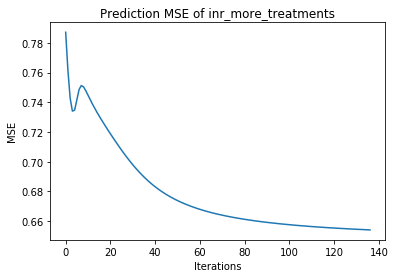

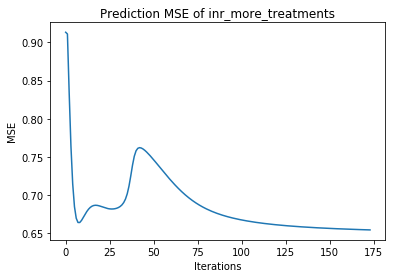

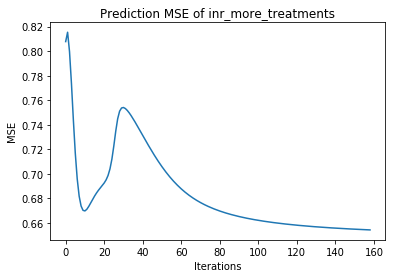

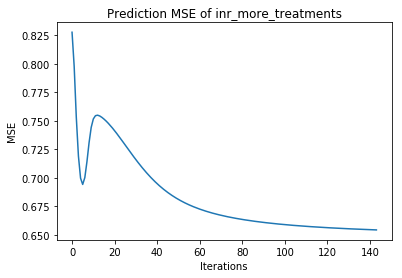

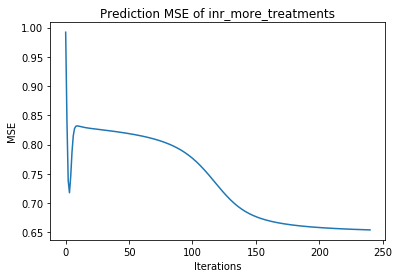

In [78]:
all_ems = multi_runs_params.get()
all_ems.pop(2)
print_coeff(all_ems, signal_name)

inr_more_treatments coefficients averaged over 8 runs
past time point 1
nsaid: -0.0083±0.0345
anticoagulant: -0.065±0.1256
transfusion_plasma: -0.6198±0.1604
transfusion_platelets: 0.1599±0.1029
aspirin: -0.1007±0.0234
past time point 2
nsaid: -0.0627±0.0308
anticoagulant: 0.1916±0.0469
transfusion_plasma: -0.3126±0.0863
transfusion_platelets: 0.0273±0.1251
aspirin: -0.1324±0.0197
past time point 3
nsaid: -0.0855±0.0161
anticoagulant: 0.1271±0.0286
transfusion_plasma: -0.328±0.0284
transfusion_platelets: 0.0502±0.1469
aspirin: -0.1102±0.0272
liver_disease: 0.3149±0.0681
sickle_cell: 0.1693±0.1397
age: 0.018±0.0077
initial state mean: 0.9231±0.5601
initial state std: 1.1823±0.4176
transition noise (std): 0.6177±0.1006
observation noise (std): 0.3839±0.201


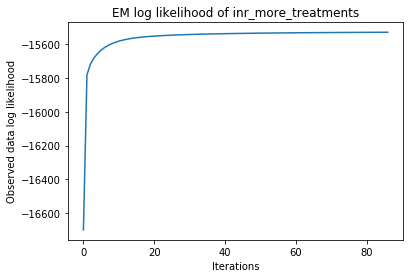

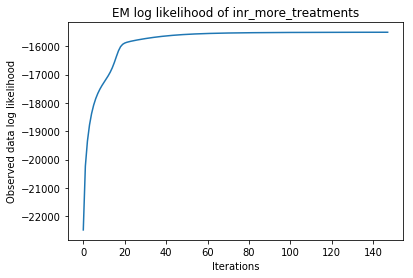

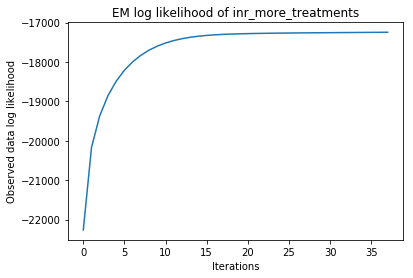

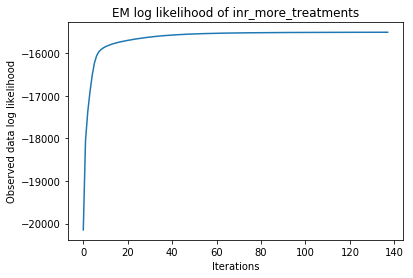

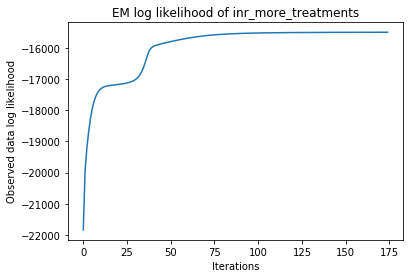

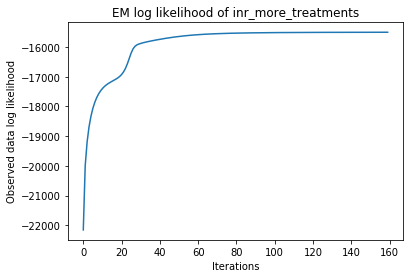

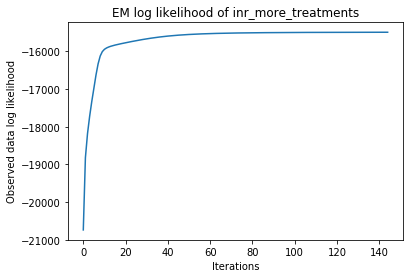

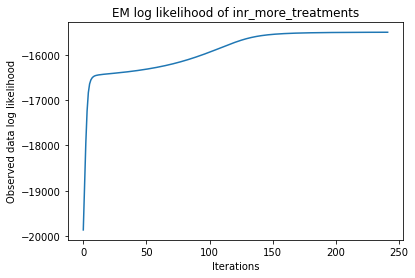

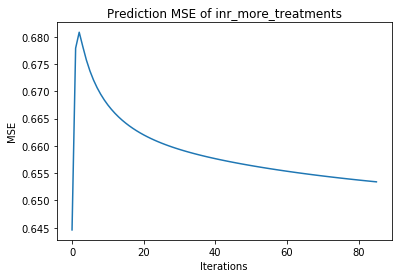

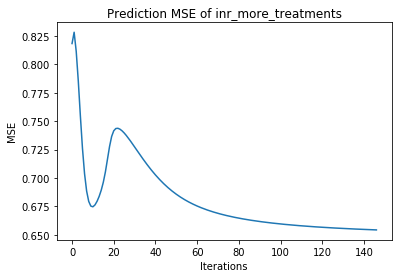

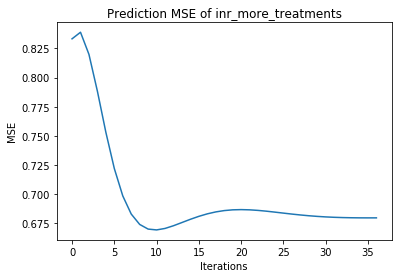

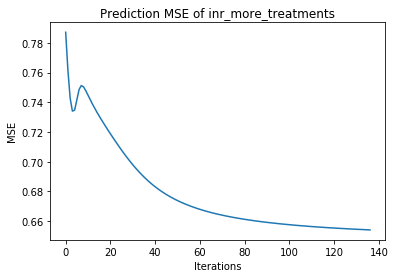

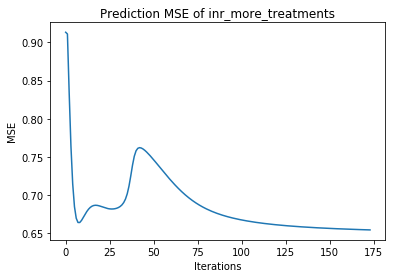

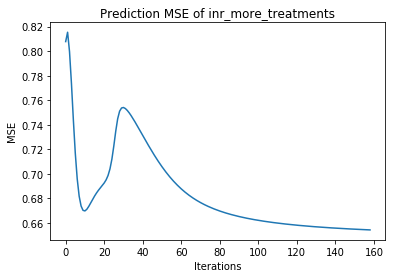

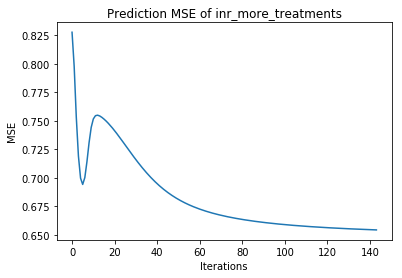

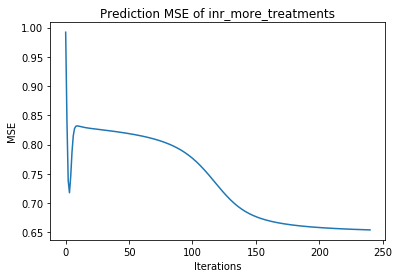

In [72]:
print_coeff(multi_runs_params.get(), signal_name)

In [80]:
have_treatment = np.array([ 79,  85, 165, 200, 308, 327, 376, 387, 500, 681, 713, 812])

Patient 387


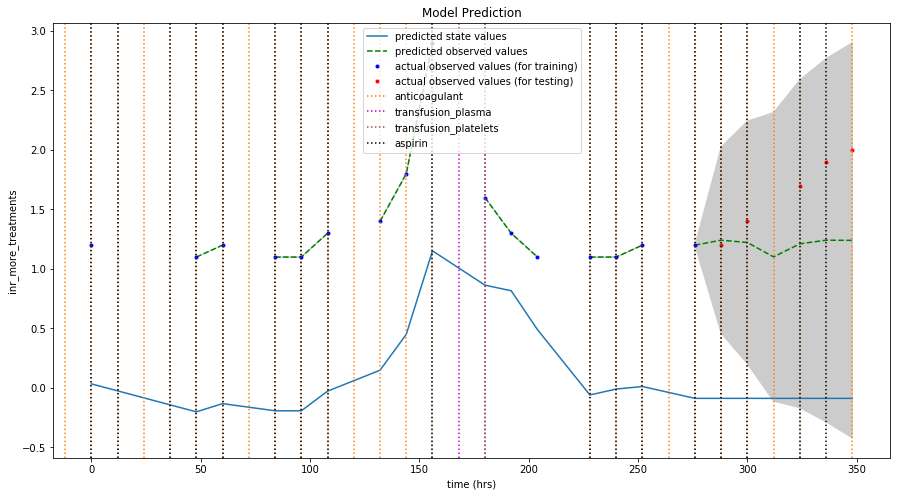

Patient 327


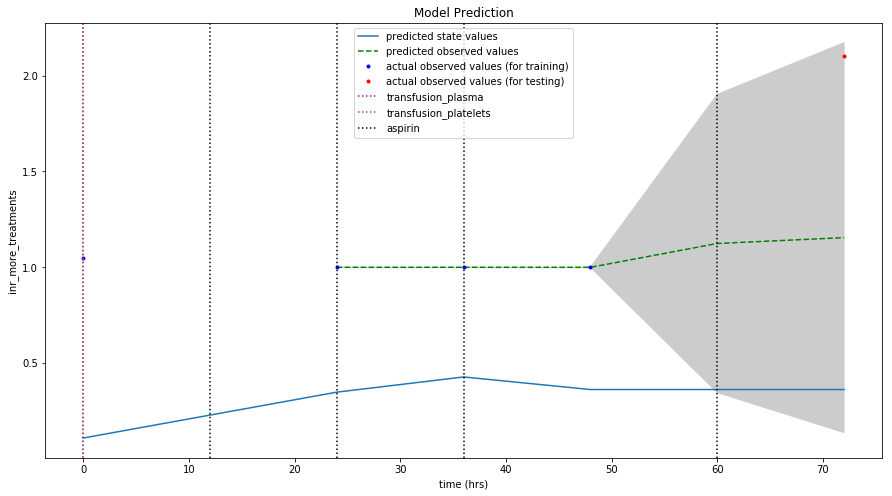

Patient 500


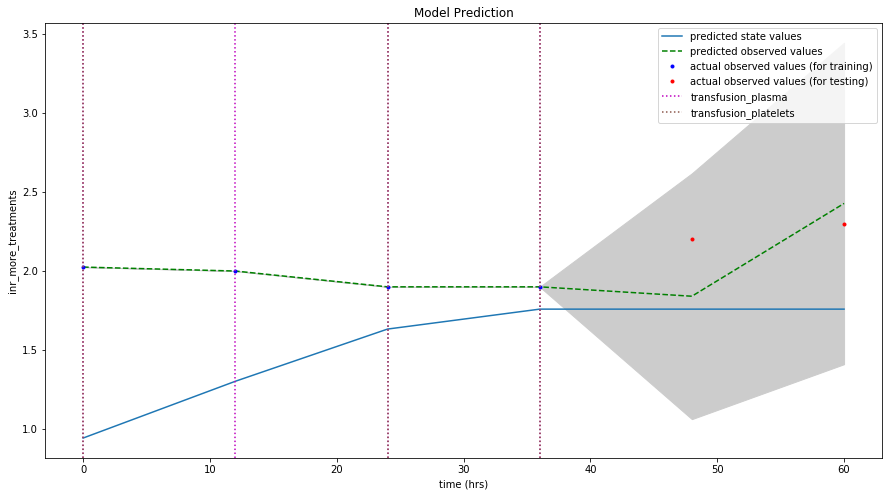

Patient 713


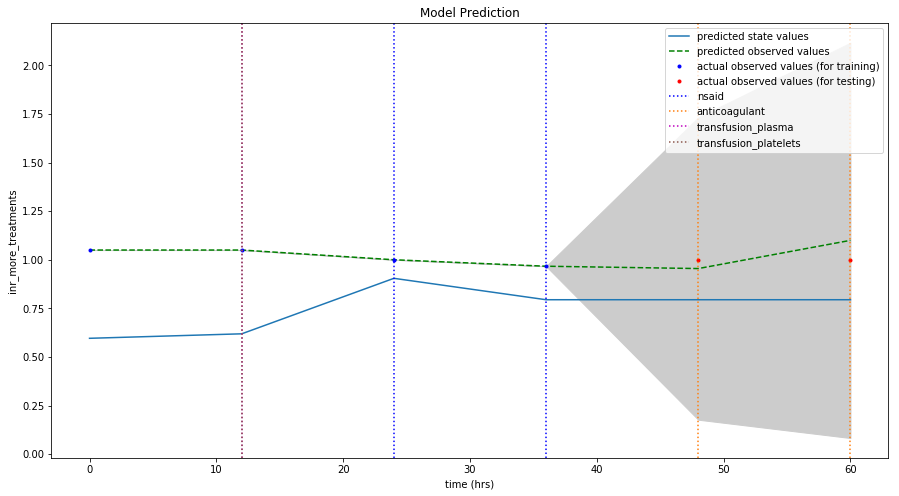

Patient 681


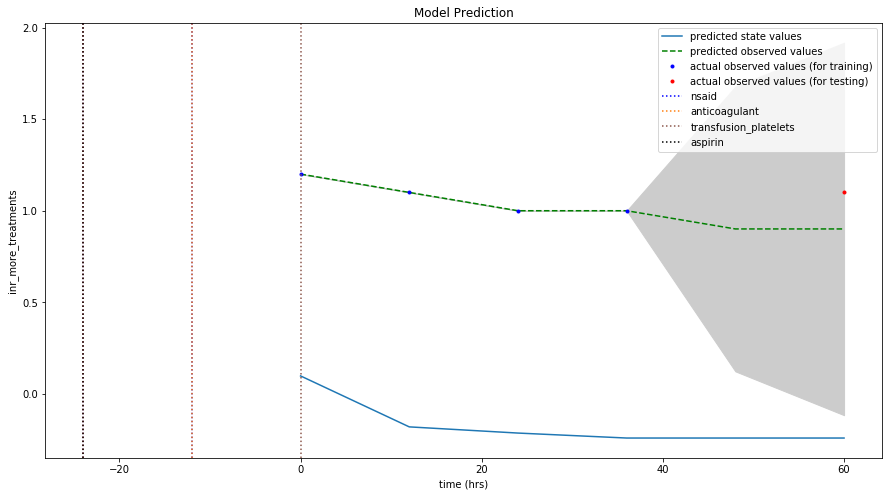

Patient 200


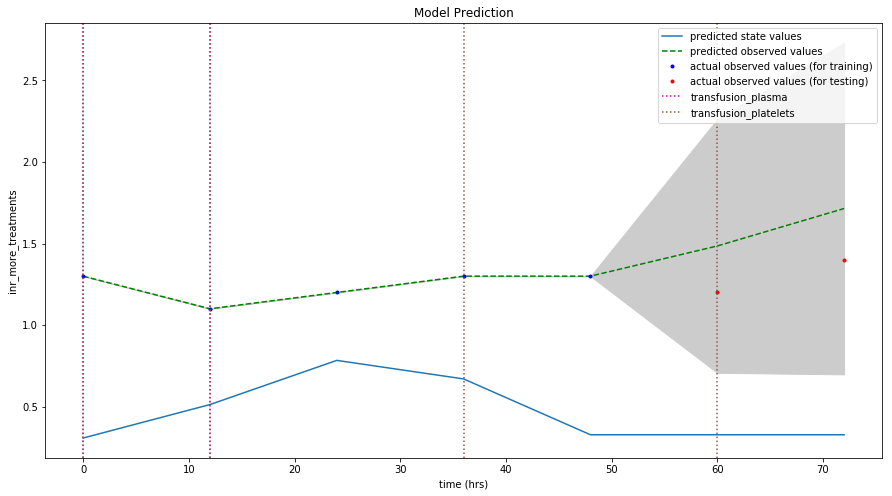

Patient 308


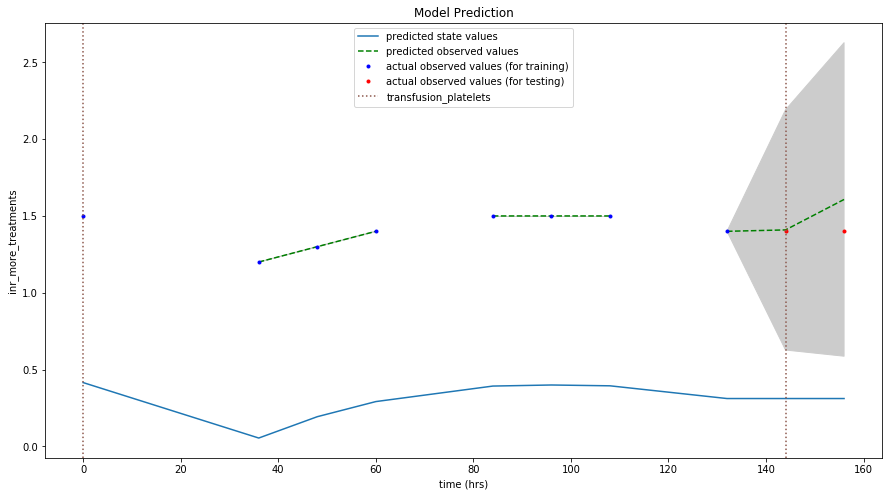

Patient 165


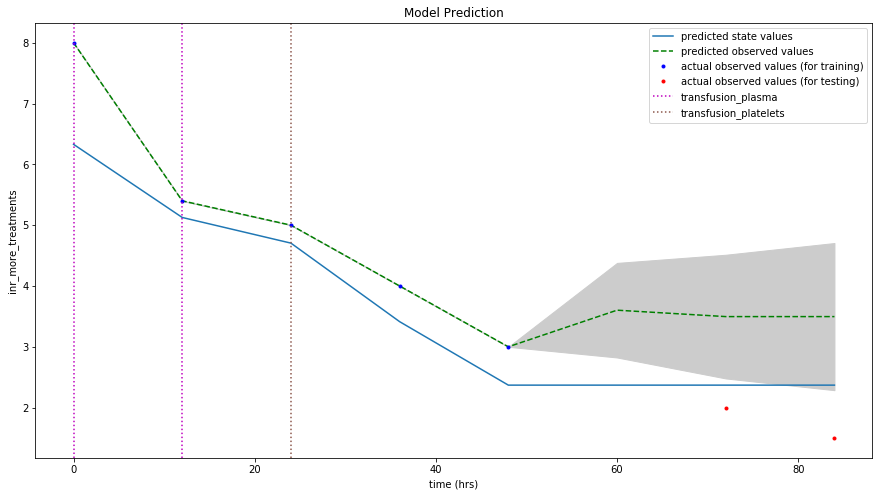

Patient 79


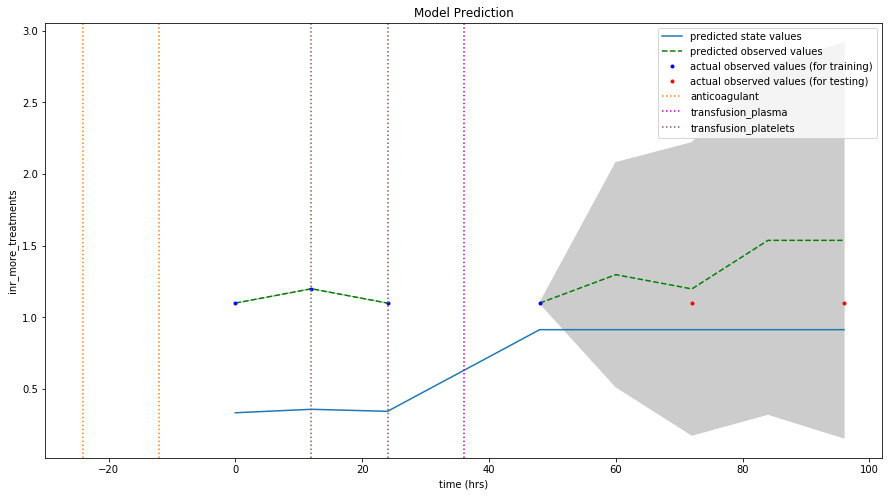

Patient 376


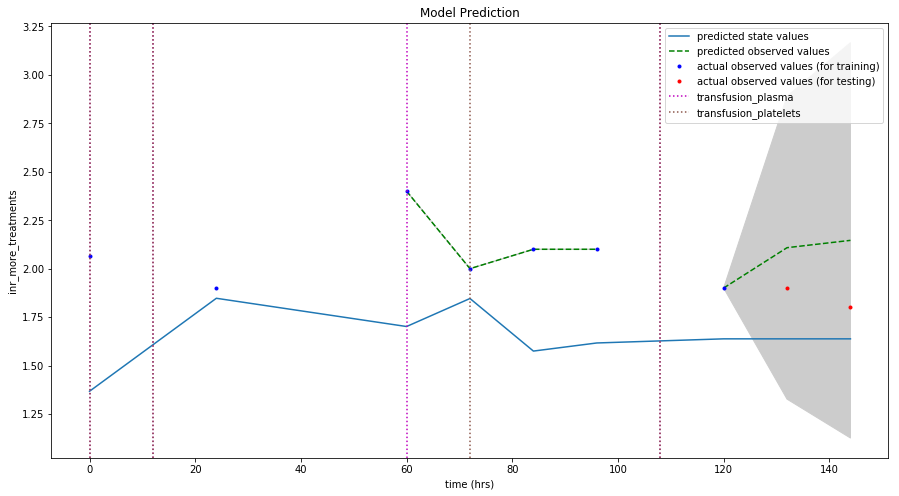

In [82]:
random_patients = np.random.choice(have_treatment, size=10, replace=False)#np.random.randint(0, em.y.shape[0], 20)
for i in random_patients:
    plot(em, i, 12, signal_name, treatment_types=list(signal_context[signal_name][0].keys()))

In [9]:
signal_name = 'creatinine'

In [10]:
params = pickle.load(open('../Data/{}_multi_runs_params'.format(signal_name), 'rb'))

creatinine coefficients averaged over 8 runs
past time point 1
dialysis: -1.325±0.0036
nephrotoxic_drugs: -0.0164±0.0002
dronedarone: -0.0623±0.0026
diuretic: 0.0417±0.0012
ace_i: 0.0077±0.0013
arb: 0.0897±0.0016
past time point 2
dialysis: -0.7755±0.014
nephrotoxic_drugs: -0.025±0.0002
dronedarone: 0.1103±0.0031
diuretic: 0.0161±0.001
ace_i: -0.0062±0.0017
arb: 0.0508±0.0012
chronic_kidney: 1.5065±0.1771
kidney_cancer: 0.376±0.1616
renal: 0.3312±0.0375
esrd: 4.0354±0.6468
sickle_cell: 0.8465±0.0975
gender: 0.3112±0.1604
admit_weight: 0.0023±0.0023
initial state mean: 0.8242±0.2983
initial state std: 1.6337±0.03
transition noise (std): 0.4159±0.01
observation noise (std): 0.1282±0.0257


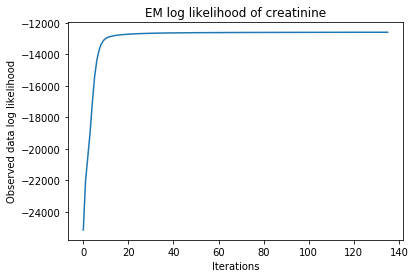

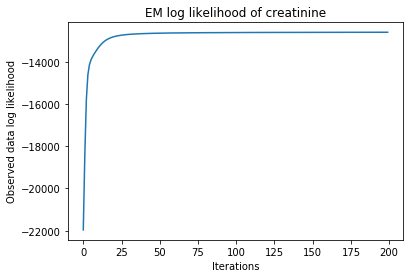

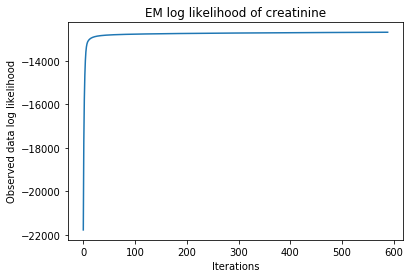

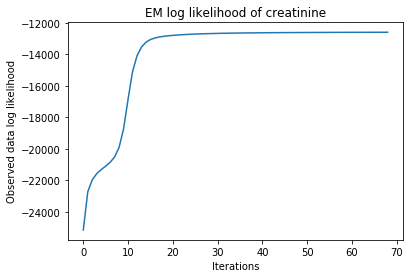

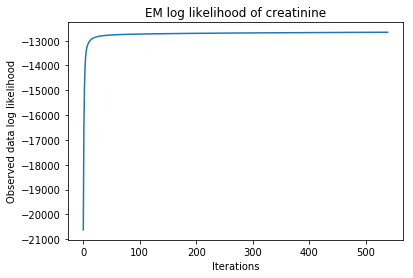

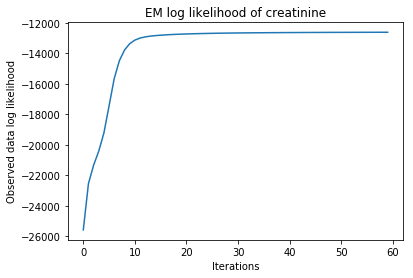

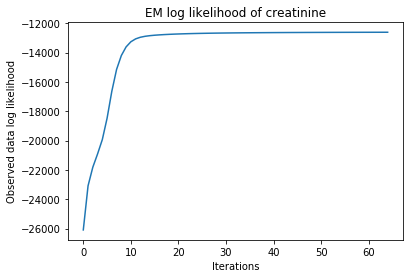

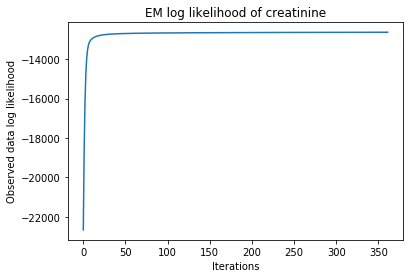

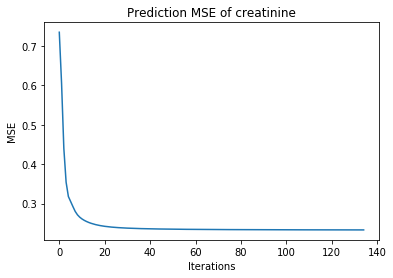

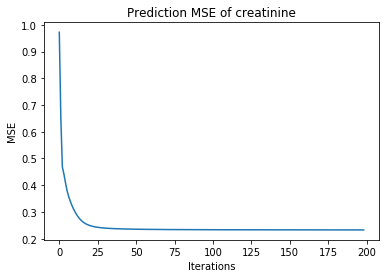

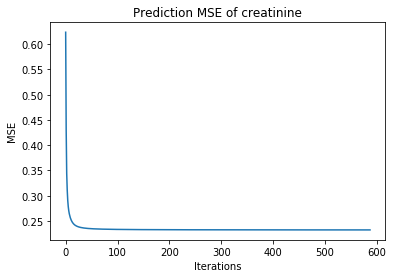

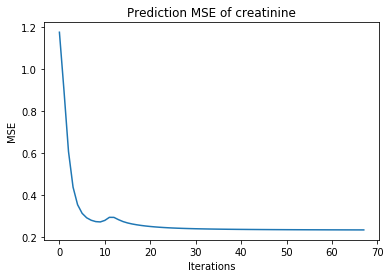

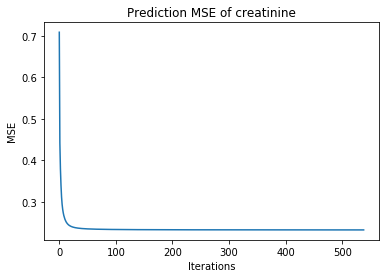

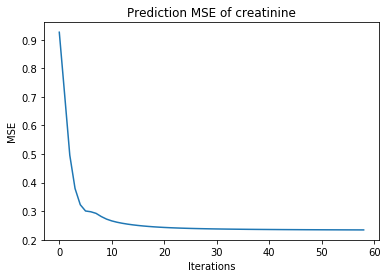

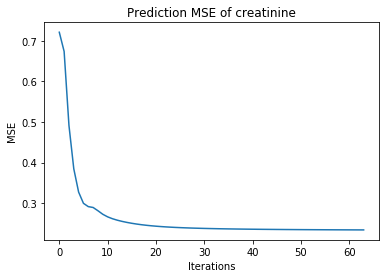

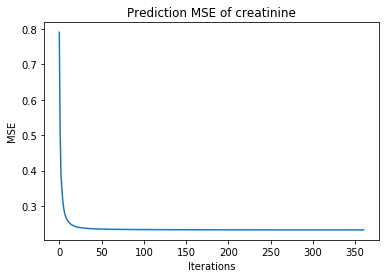

In [11]:
print_coeff(params, signal_name)

In [12]:
em = params[1]

In [13]:
have_treatment = np.array([   5,   18,   36,   63,  115,  119,  130,  140,  159,  181,  190,
        199,  218,  231,  241,  252,  299,  302,  313,  324,  328,  361,
        467,  473,  480,  484,  486,  503,  515,  547,  576,  599,  603,
        608,  656,  718,  735,  742,  754,  771,  776,  800,  809,  827,
        875,  903,  908,  954,  961,  984, 1017, 1028, 1040, 1045, 1057,
       1059, 1064, 1081, 1116, 1156, 1165, 1182, 1224, 1241, 1242, 1245,
       1285, 1287, 1307, 1318, 1323, 1378, 1406, 1432, 1446, 1531, 1534,
       1544, 1560, 1569, 1585, 1586, 1640, 1696, 1778, 1860, 1879, 1913,
       1949, 2013, 2018, 2123, 2227, 2294, 2330, 2336, 2370, 2395])

### Analysis
Changes
* Only select patients with at least 4 training observations (total of 1821)

On real data
* Issues:
    * treatments coefficients are negative while they should be positive
        * changing initialization doesn't seem to help as model converges in bad local min, and most directions still don't change
    * observation noise is bigger than transition noise
    * run time is long, each iteration takes 4s, M step takes 2.5s, loglik takes 1s
* Reasons:
    * The increasing effects of treatments are not pronouced in the data (see Source Data Analysis)
        * it makes sense that nsaid and aspirin shows small number close to zero since their effects are 50-50.
        * transfusion platelet should be more negative than others, also makes sense.
        * the first number for plasma is a very negative number, but should be close to zero
        * anticoagulant are more negative than platelet, but should be more similar
    * bad noise estimation is expected, specifically underestimated initial state variance and overestimated observational noise 
    
On simulation
* Issues
    * b seems to be harder to identify correctly compared to A (sensitive to initialization)
    * estimated sigma 0 and sigma 2 are very different from the true value (not sensitive to initialization)
        * underestimate sigma 0, overestimate sigma 2
* Reasons
   